## **5. Censo Nacional de Población y Vivienda**
Con base en los microdatos del Censo Nacional de Población y Vivienda del 2018 podemos hacer una visualización del tejido demográfico de Colombia.

[Obtener los microdatos](https://microdatos.dane.gov.co/index.php/catalog/643/get-microdata). Estos archivos están a nivel de municipio, por lo que requieren cierto preprocesamiento para agregarlos. Acá descargaremos un archivo que preparamos donde están juntos todos los municipios.

In [ ]:
# Descarga el archivo con lo smicrodatos del censo
!gdown --id 1rcAryLQQslZI9a1jFjtbCQ2XkJKE2Wdi

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rcAryLQQslZI9a1jFjtbCQ2XkJKE2Wdi
To: /content/agregado_censo_2018.csv
100% 9.35M/9.35M [00:00<00:00, 144MB/s]


In [ ]:
import pandas as pd
per_df = pd.read_csv("agregado_censo_2018.csv")

**Variables a utilizar**
* **U_DPTO**: código de dos dígitos del departamento.
* **U_MPIO**: código de tres dígitos del municipio.
* **UA_CLASE**: clase de la población (1: Cabecera Municipal, 2: Centro Poblado, 3**: Rural Disperso).
* **P_SEXO**: sexo de la persona (1: Hombre, 2: Mujer).
* **PA1_GRP_ETNIC**: grupo étnico al que pertenece la persona (1: Indígena, 2: Gitano(a) o Rrom, 3: Raizal del Archipielago de San Andrés, Providencia y Santa Catalina, 4: Palenquero(a) de San Basilio, 5: Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a), 6: Ningún grupo étnico).
* **P_EDADR**: grupo de edad de cada persona. No es la edad exacta, sino que está agrupada en franjas de 5 años (de 0 a 4, de 5 a 9, de 10 a 14, etc...)
* **CONDICION_FISICA**: indica si la persona tiene alguna dificultad física en su vida diaria (1: Sí, 2: No)
* **N**: cantidad de personas que representa cada observación.

In [ ]:
per_df.sample(5)

,U_DPTO,U_MPIO,UA_CLASE,P_SEXO,PA1_GRP_ETNIC,P_EDADR,CONDICION_FISICA,N
379750,76,606,1,1,6,11,1.0,43
109459,17,616,2,2,9,6,2.0,1
183493,25,320,1,1,6,11,1.0,21
164400,23,580,1,1,1,17,2.0,2
249576,47,675,3,2,6,9,2.0,6


In [ ]:
print(f'Hay {per_df["N"].sum()} personas en la base de datos del censo')

Hay 44164417 personas en la base de datos del censo


Para este ejercicio vamos a identificar cuántas personas están dentro de la población que requiere cuidado en Colombia. Para esto podemos hacer varias agrupaciones:
1. Edad: personas menores de 15 y mayores de 60 años.
2. Condifión física: personas que respondieron que cuentan con dificultades físicas en su vida diaria.

In [ ]:
# Separamos las edades según las categorías de la variable P_EDADR
per_df["grupos_edad"] = pd.cut(
    x=per_df["P_EDADR"],
    bins=[0,3,12,22],
    labels=["0-14","15-59","60+"],
    right=True
)
per_df["grupos_edad"].value_counts().sort_index()

grupos_edad
0-14      66370
15-59    215963
60+      132401
Name: count, dtype: int64

In [ ]:
per_df["CONDICION_FISICA"].value_counts(dropna=False)

CONDICION_FISICA
2.0    247497
1.0    146643
NaN     20594
Name: count, dtype: int64

In [ ]:
per_df["CONDICION_FISICA"].fillna(9,inplace=True)
per_df["CONDICION_FISICA"] = per_df["CONDICION_FISICA"].astype(int)
per_df["CONDICION_FISICA"].value_counts(dropna=False)

In [ ]:
dict_censo_2018 = {
    'UA_CLASE': {
        '1': 'Cabecera Municipal',
        '2': 'Centro Poblado',
        '3': 'Rural Disperso',
        '4': 'Resto Rural'
    },
    'P_SEXO': {
        '1': 'Hombre',
        '2': 'Mujer'
    },
    'CONDICION_FISICA': {
        '1': 'SI',
        '2': 'NO',
        '9': 'NA'
    },
    'P_EDADR': {
        '1': 'de 00 A 04 Años','2': 'de 05 A 09 Años','3': 'de 10 A 14 Años',
        '4': 'de 15 A 19 Años','5': 'de 20 A 24 Años','6': 'de 25 A 29 Años',
        '7': 'de 30 A 34 Años','8': 'de 35 A 39 Años','9': 'de 40 A 44 Años',
        '10': 'de 45 A 49 Años','11': 'de 50 A 54 Años','12': 'de 55 A 59 Años',
        '13': 'de 60 A 64 Años','14': 'de 65 A 69 Años','15': 'de 70 A 74 Años',
        '16': 'de 75 A 79 Años','17': 'de 80 A 84 Años','18': 'de 85 A 89 Años',
        '19': 'de 90 A 94 Años','20': 'de 95 A 99 Años','21': 'de 100 y más Años'
        }
}

In [ ]:
for k,v in dict_censo_2018.items() :
    if k not in per_df :
        continue
    per_df[f"{k}_lab"] = per_df[k].astype(str).map(v)

per_df["divipola"] = (per_df["U_DPTO"]*1000) + per_df["U_MPIO"]

In [ ]:
per_df.sample(5)

,U_DPTO,U_MPIO,UA_CLASE,P_SEXO,PA1_GRP_ETNIC,P_EDADR,CONDICION_FISICA,N,grupos_edad,UA_CLASE_lab,P_SEXO_lab,CONDICION_FISICA_lab,P_EDADR_lab,divipola
68100,13,490,3,2,5,4,2,2,15-59,Rural Disperso,Mujer,NO,de 15 A 19 Años,13490
247417,47,545,2,2,5,8,2,1,15-59,Centro Poblado,Mujer,NO,de 35 A 39 Años,47545
40905,5,790,2,2,9,9,2,1,15-59,Centro Poblado,Mujer,NO,de 40 A 44 Años,5790
56408,8,832,3,2,5,14,1,1,60+,Rural Disperso,Mujer,SI,de 65 A 69 Años,8832
392427,85,230,3,2,1,2,2,96,0-14,Rural Disperso,Mujer,NO,de 05 A 09 Años,85230


In [ ]:
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

per_df["edad_aux"] = per_df["P_EDADR"]
per_df.loc[per_df["P_EDADR"]>=18,"edad_aux"] = 85
per_df["edad_lab_aux"] = per_df["P_EDADR_lab"]
per_df.loc[per_df["P_EDADR"]>=18,"edad_lab_aux"] = "85+"

pop_pyramid = per_df.groupby(["edad_lab_aux","edad_aux","P_SEXO_lab"],dropna=False)["N"].sum().reset_index()
pop_pyramid.head(10)

,edad_lab_aux,edad_aux,P_SEXO_lab,N
0,85+,85,Hombre,168018
1,85+,85,Mujer,256392
2,de 00 A 04 Años,1,Hombre,1555605
3,de 00 A 04 Años,1,Mujer,1482176
4,de 05 A 09 Años,2,Hombre,1705574
5,de 05 A 09 Años,2,Mujer,1629666
6,de 10 A 14 Años,3,Hombre,1848218
7,de 10 A 14 Años,3,Mujer,1762366
8,de 15 A 19 Años,4,Hombre,1970530
9,de 15 A 19 Años,4,Mujer,1881725


In [ ]:
pop_pyramid = pop_pyramid.pivot(index=["edad_lab_aux","edad_aux"],columns="P_SEXO_lab",values="N").reset_index()
pop_pyramid["label"] = pop_pyramid["edad_lab_aux"].apply(lambda s: "-".join(re.findall("[0-9]+",s))).str.replace("85","85+")
pop_pyramid.head(10)

P_SEXO_lab,edad_lab_aux,edad_aux,Hombre,Mujer,label
0,85+,85,168018,256392,85+
1,de 00 A 04 Años,1,1555605,1482176,00-04
2,de 05 A 09 Años,2,1705574,1629666,05-09
3,de 10 A 14 Años,3,1848218,1762366,10-14
4,de 15 A 19 Años,4,1970530,1881725,15-19
5,de 20 A 24 Años,5,1983553,1956735,20-24
6,de 25 A 29 Años,6,1835158,1857016,25-29
7,de 30 A 34 Años,7,1649783,1700746,30-34
8,de 35 A 39 Años,8,1560417,1656227,35-39
9,de 40 A 44 Años,9,1308328,1436336,40-44


In [ ]:
hom_pop = pop_pyramid["Hombre"].sum()
muj_pop = pop_pyramid["Mujer"].sum()
tot_pop = hom_pop + muj_pop

print("La población de hombres es:",hom_pop)
print("La población de mujeres es:",muj_pop)
print("La población total es:",tot_pop)

La población de hombres es: 21570493
La población de mujeres es: 22593924
La población total es: 44164417


In [ ]:
pop_pyramid["Hombre_width"] = pop_pyramid["Hombre"].div(tot_pop*-1)
pop_pyramid["Mujer_width"] = pop_pyramid["Mujer"].div(tot_pop)

pop_pyramid.sort_values("edad_aux",inplace=True)
pop_pyramid

P_SEXO_lab,edad_lab_aux,edad_aux,Hombre,Mujer,label,Hombre_width,Mujer_width
1,de 00 A 04 Años,1,1555605,1482176,00-04,-0.035223,0.033560
2,de 05 A 09 Años,2,1705574,1629666,05-09,-0.038619,0.036900
3,de 10 A 14 Años,3,1848218,1762366,10-14,-0.041849,0.039905
4,de 15 A 19 Años,4,1970530,1881725,15-19,-0.044618,0.042607
5,de 20 A 24 Años,5,1983553,1956735,20-24,-0.044913,0.044306
6,de 25 A 29 Años,6,1835158,1857016,25-29,-0.041553,0.042048
7,de 30 A 34 Años,7,1649783,1700746,30-34,-0.037355,0.038509
8,de 35 A 39 Años,8,1560417,1656227,35-39,-0.035332,0.037501
9,de 40 A 44 Años,9,1308328,1436336,40-44,-0.029624,0.032522
10,de 45 A 49 Años,10,1245829,1400272,45-49,-0.028209,0.031706


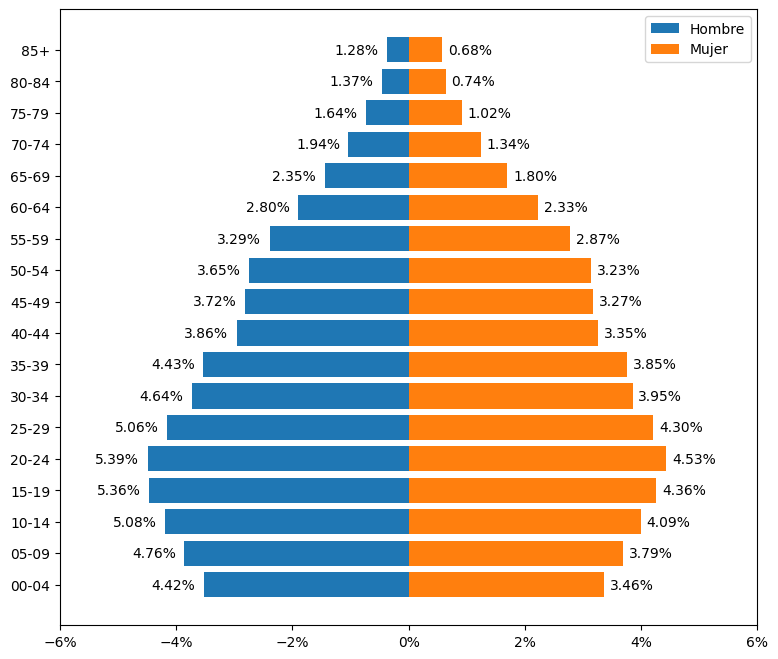

In [ ]:
fig,ax = plt.subplots(figsize=(9,8))

for s in ["Hombre","Mujer"] :
    rect = ax.barh(pop_pyramid["label"],pop_pyramid[f"{s}_width"],label=s)
    if s == "Mujer" :
        offset_x = 0.001
        sign_x = 1
    else :
        offset_x = -0.009
        sign_x = -1
    for r in rect :
        rx = r.get_width() + offset_x
        ry = r.get_y() + (r.get_height()/3)
        ax.annotate(f"{rx*sign_x:.2%}",(rx,ry))

ax.legend()

ax.set_xlim([-0.06,0.06])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))

plt.show()